# ScotiaBank Data Challenge: Predict oil prices on Nov. 16th, 2018
## By Matthias Le Dall

## What will the price of oil be on Friday, November 16th, 2018?

Here is the Jupyter Notebook that explains my solution. Here, you will find the following sections
- __Introduction:__ method, dataset and result
- __Data Import:__ importing the data
- __Data Exploration:__ vizualising, summarizing and checking the quality of the data
- __Data Splitting:__ splitting the data into the training and predicting sets
- __Feature Engineering:__ transforming the data to create variables that will be used for training
- __Shaping the data for LSTM:__ reshaping the data as input to the LSTM
- __Training the LSTM model:__ definition and training of the LSTM neural net
- __Make predictions:__ Comparing the original data set to my predictions and predicting new data

## Introduction

In order to answer this question, I decided to use data from the __West Texas Intermediate (WTI)__ prices. The set contains 4 years of price data and can be found here, https://fred.stlouisfed.org/series/DCOILWTICO.

### Why did I choose this dataset

I chose this dataset for a few basic reasons,
- The data contains the actual price of oil
- Among the datasets that contain oil prices, it is one of only two that contain _daily_ prices
- The West Texas Intermediate is a crude oil, a grade of oil, that is used as a benchmark for oil prices
- It is sold out of the New York Mercantile Exchange (NYMEX), which makes it quite relevant on the world stage

For all these reasons, this data set was seemed to be both the easiest and most relevant to start with this challenge.

### What is my approach?

I decided to make use of a Long-Short-Term-Memory (LSTM) neural net, which is a Recurrent Neural Network (RNN) architecture known for its ability to learn from both long and short timescales in the data. This is important in our case since the daily fluctuations of oil prices can display variations at different timescales, e.g. daily, monthly, yearly variations.

To be more specific, I used a walk-forward algorithm which is broken down as follows,

1. The time series data is broken down into windows of time
2. Use a window of $N_{past}$ days in the past, to predict a window of $N_{future}$ days in the future
3. Shift the window forward to take a new window
4. Repeat steps 2 and 3 for until the date wanted is reached 

I found that the optimum predictive accuracy was reached for,
- $N_{past} = 8$, which includes today
- $N_{future} = 1$


### Dataset and result

The results in this document only show the results only for 1000 data points instead of the whole data. This was done to save time while training. The code I submitted will run through the complete data set and takes up to one hour to run.

Below is a quick vizualisation of the time series data,

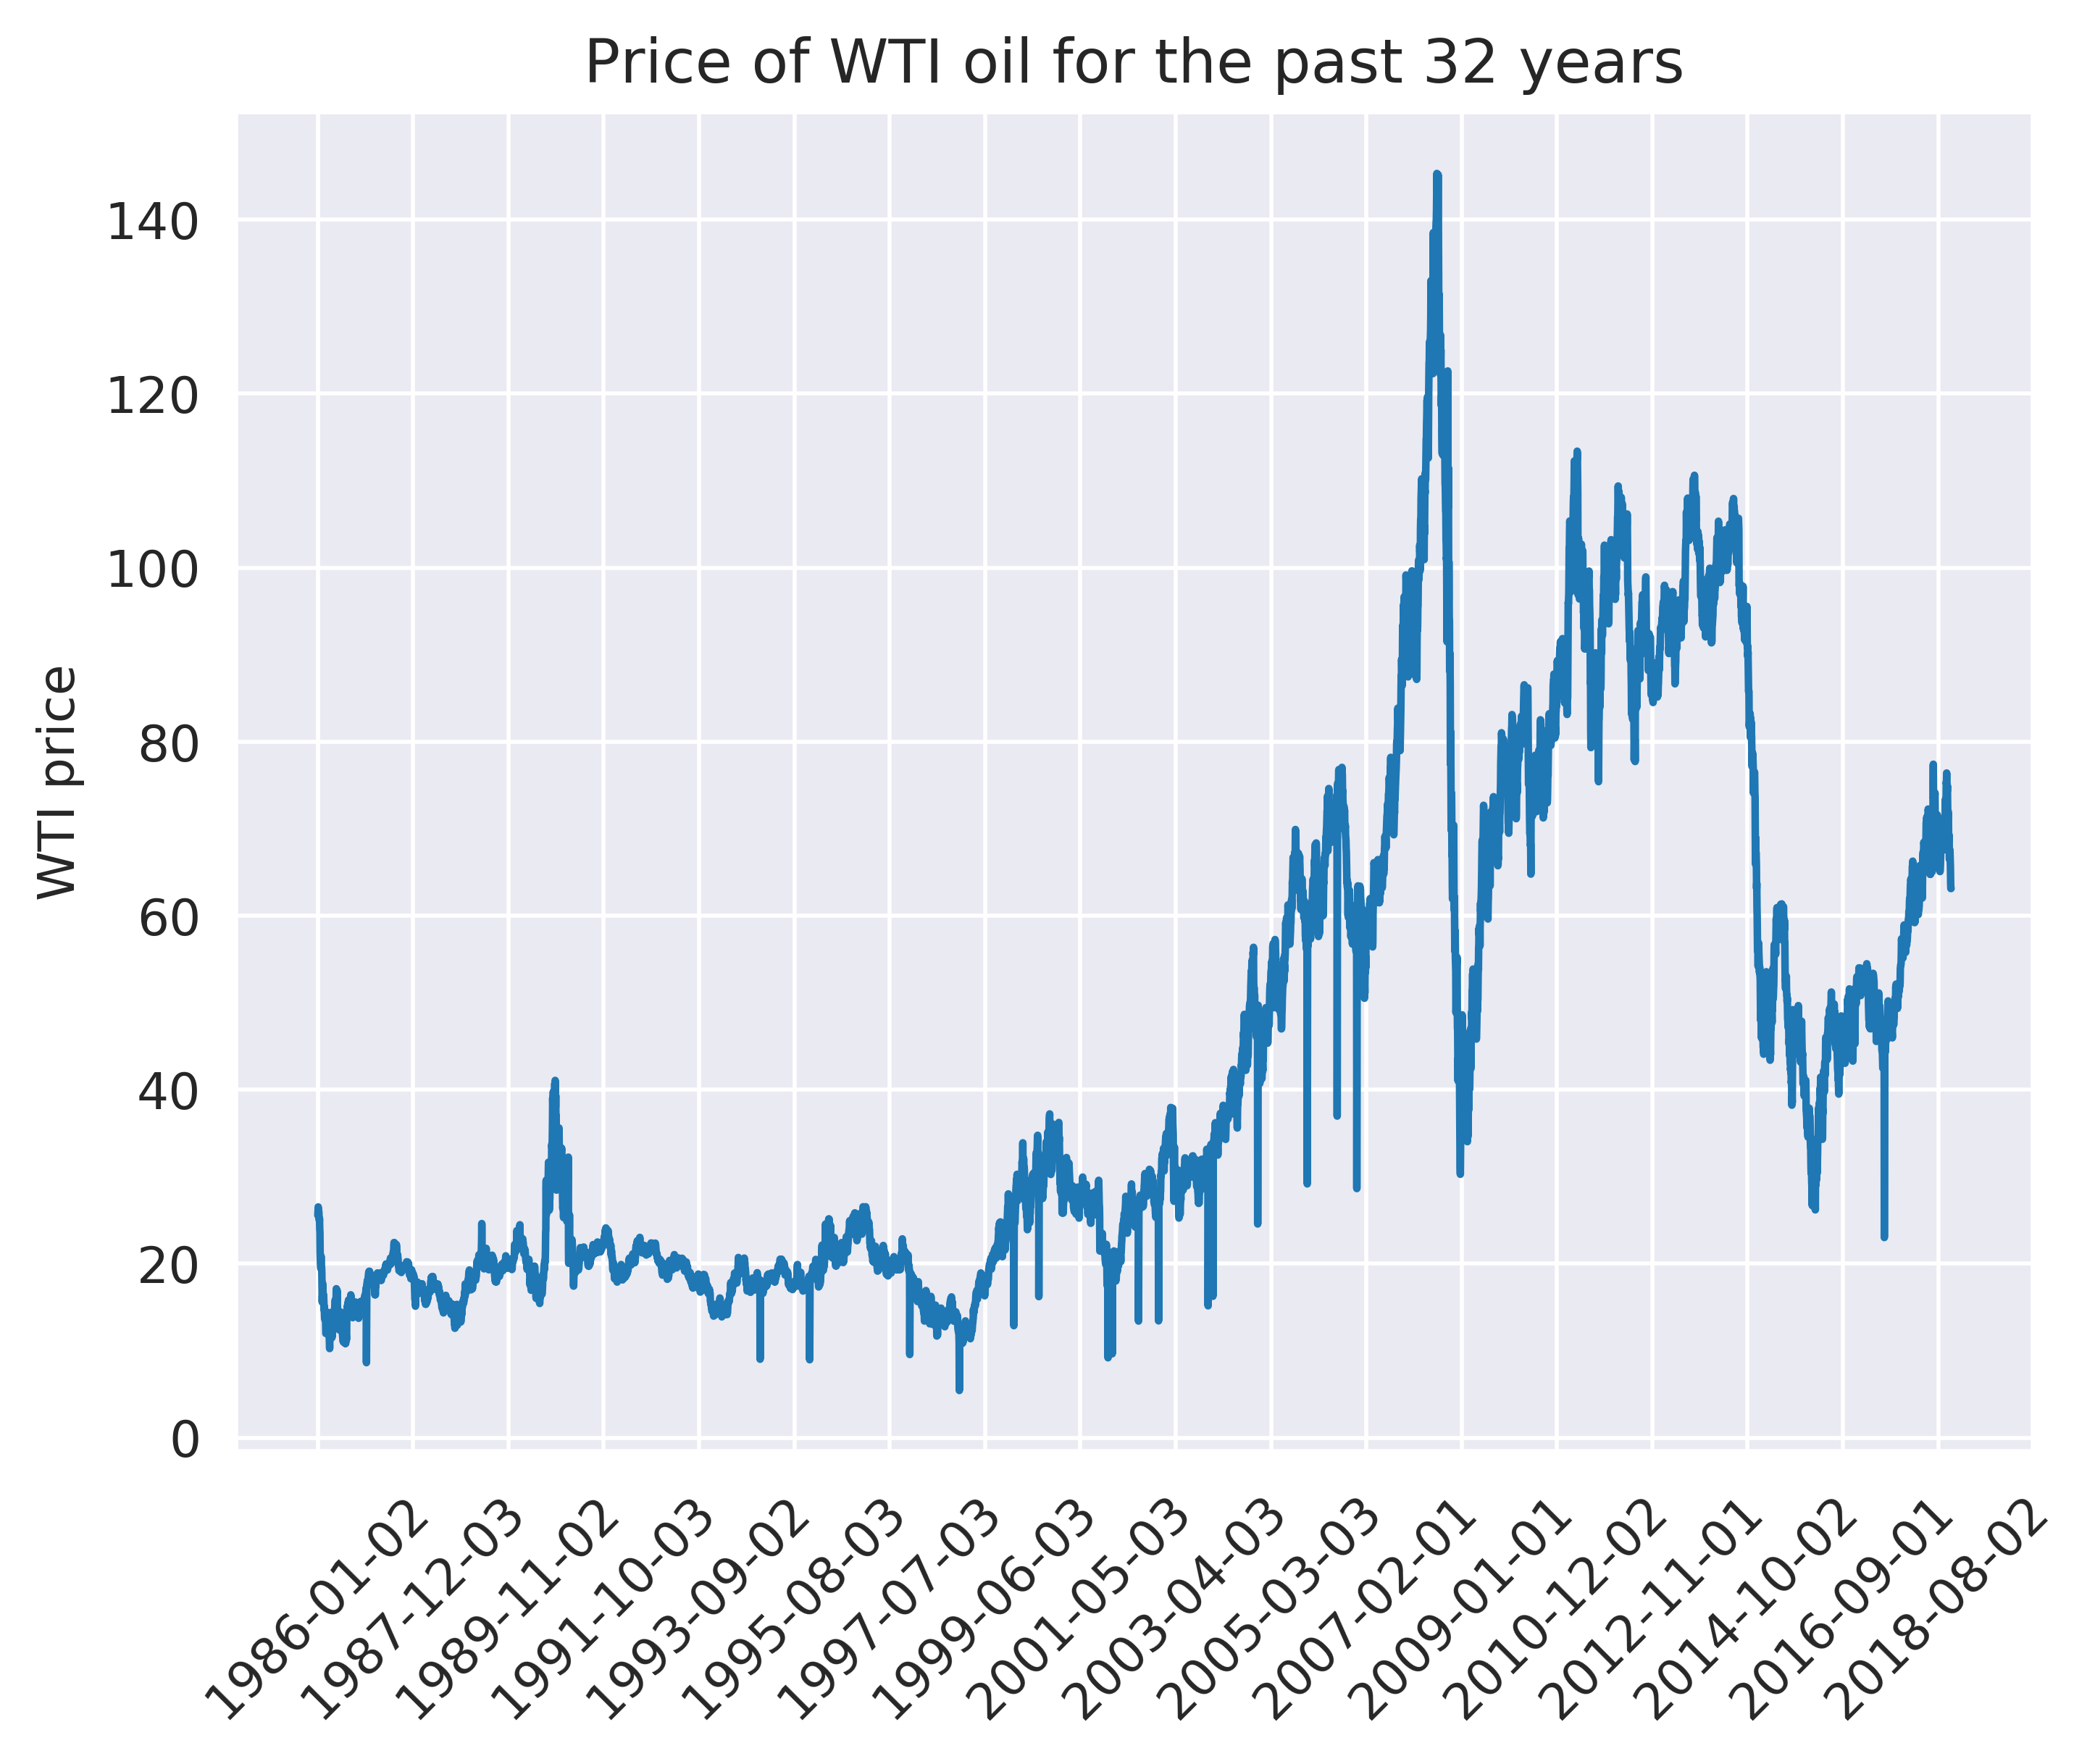

In [1510]:
from IPython.display import Image
Image(filename = 'WTI_oil_prices.png')

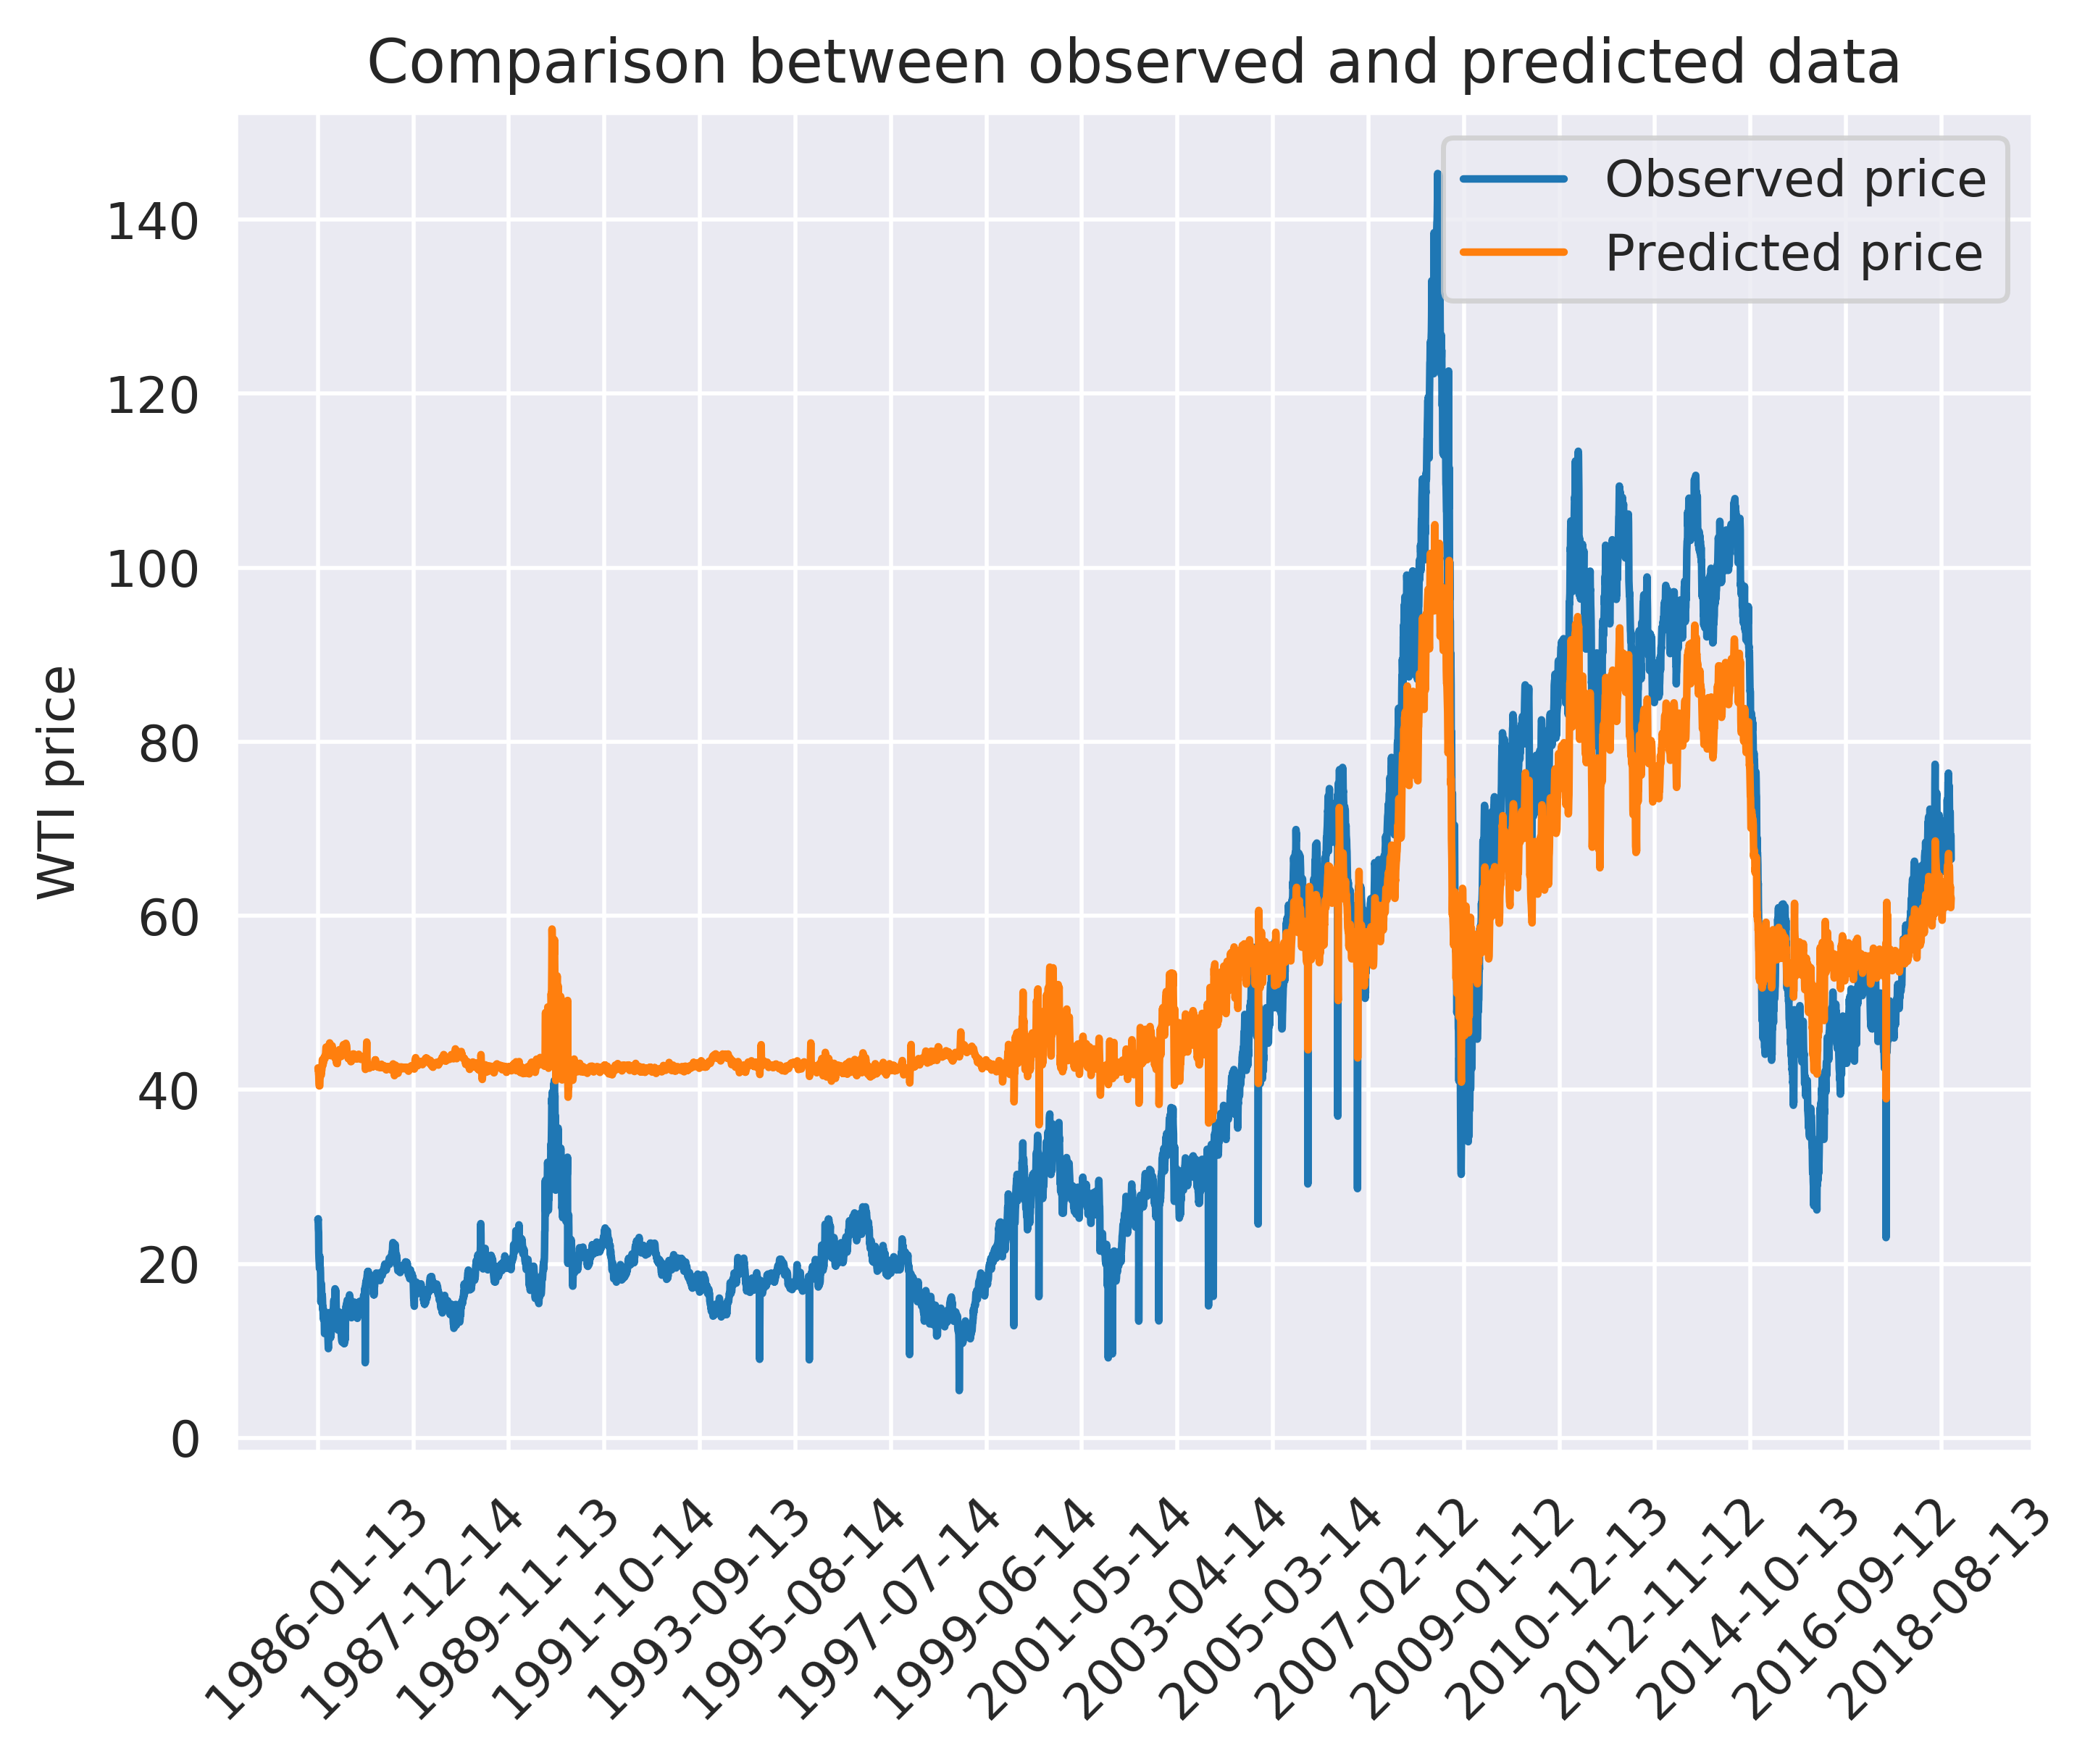

In [1513]:
Image(filename = 'WTI_oil_price_comparison.png')

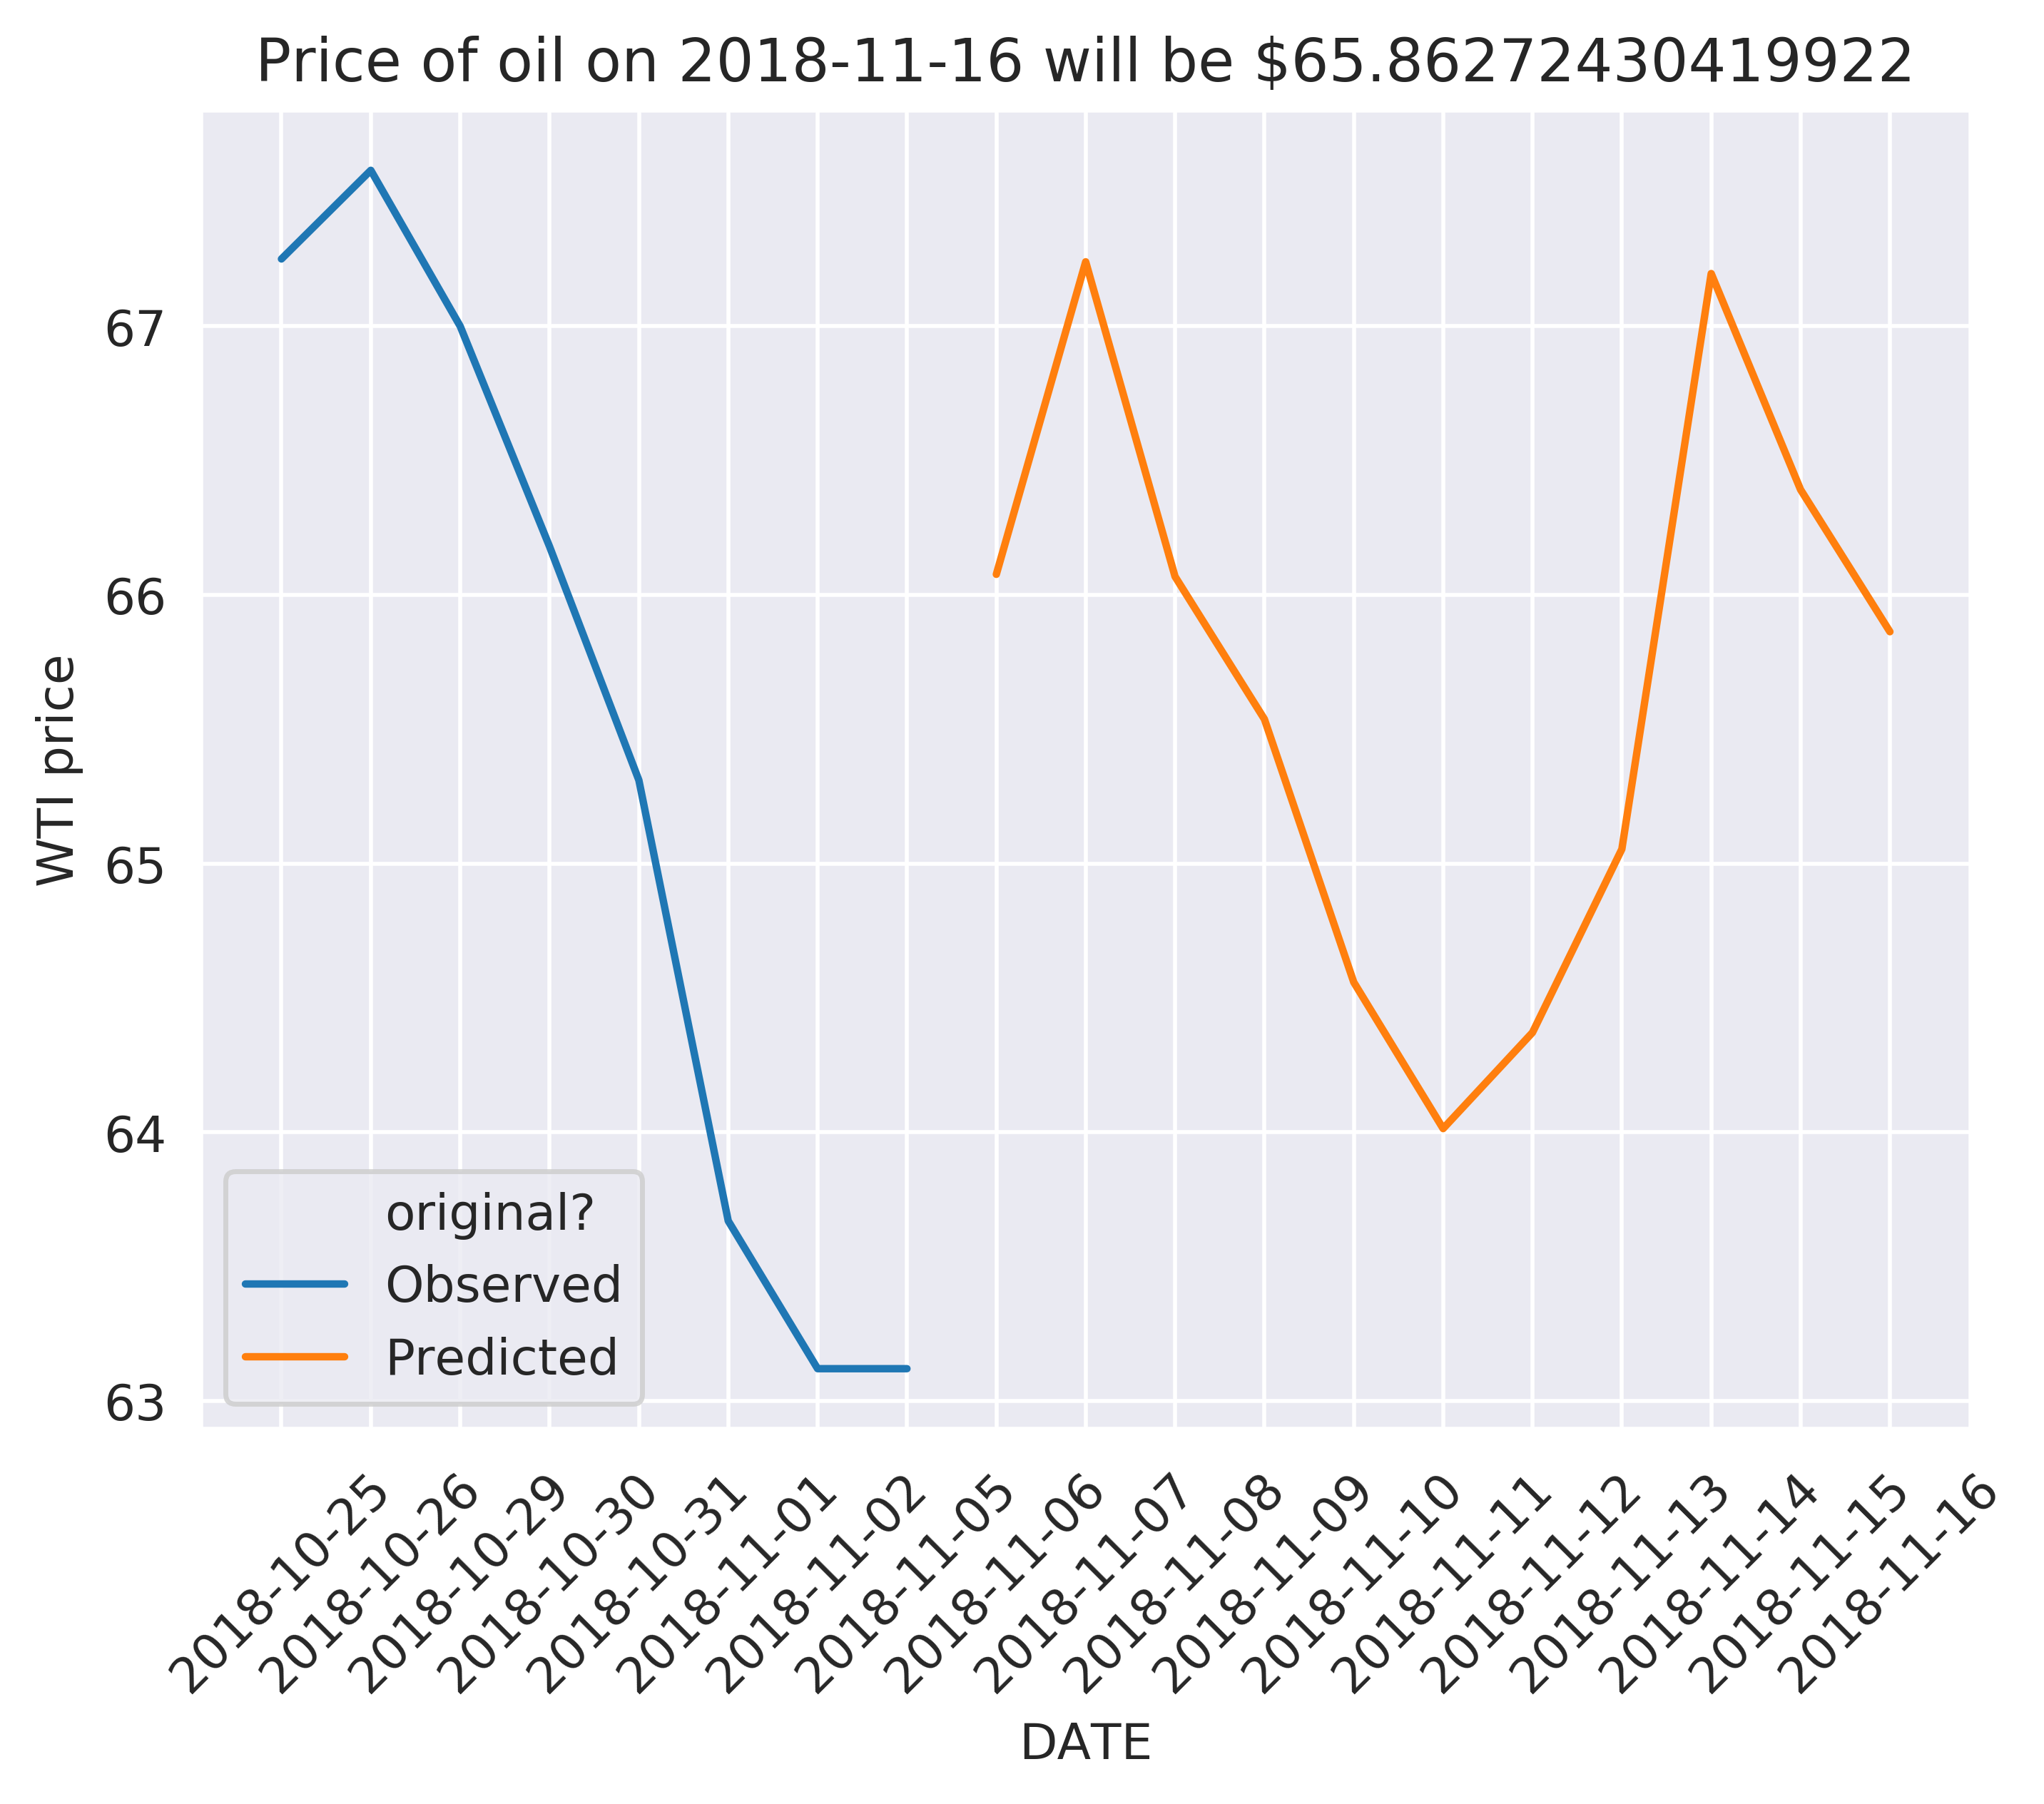

In [1511]:
Image(filename = 'WTI_oil_price_predictions.png')

# Code

## Data import

In [ ]:
# Importing and feature engineering data
print(' - Imports data and formats the data')
data = data_import()

In [1392]:
df.head()

,DATE,WTI
0,2013-11-05,93.40
1,2013-11-06,94.74
2,2013-11-07,94.25
3,2013-11-08,94.56
4,2013-11-11,95.13


The data represents 5 years of daily WTI prices

## Data exploration

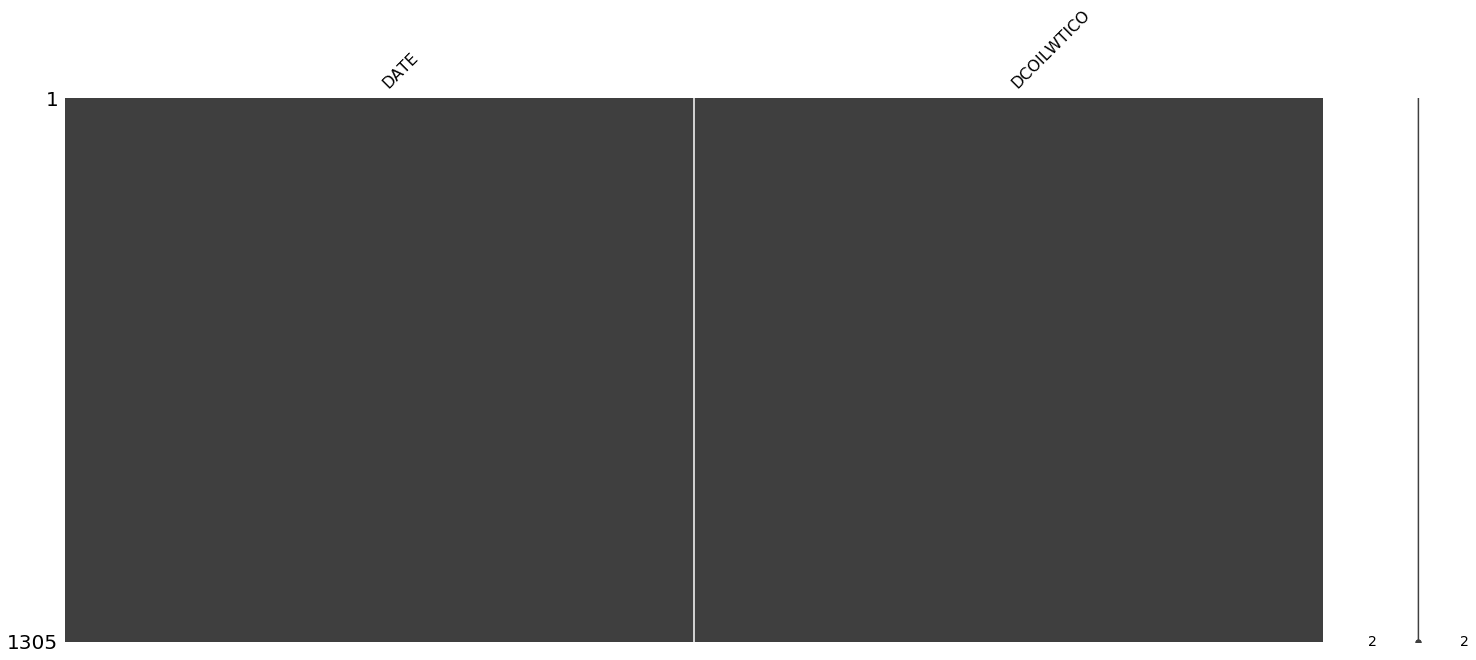

In [786]:
# Checking for missing data
msno.matrix(df)

We find that the dataset is pretty clean, though the entries are string, as all entries are __object__ ,

In [787]:
df.dtypes

DATE          object
DCOILWTICO    object
dtype: object

In addition, we note that, even though no entry is missing, some entries contain no information. Specifically, we find 46 entries that are __'.'__ instead of values.

In [874]:
# Entries that contain no information
df[df['WTI'] == '.'].describe()

,DATE,WTI
count,46,46
unique,46,1
top,2018-01-15,.
freq,1,46


In [1393]:
df = data_imputing(data)

In [876]:
df.dtypes

DATE     object
WTI     float64
dtype: object

In [885]:
df.describe()

,WTI
count,1305.000000
mean,61.508111
std,20.692553
min,23.010000
25%,46.820000
50%,53.240000
75%,70.470000
max,107.950000


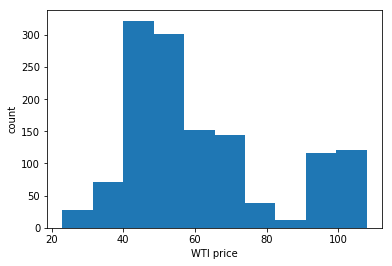

In [886]:
plt.hist(df['WTI'].values)
plt.xlabel('WTI price')
plt.ylabel('count')
plt.show()

## Data Splitting

In [1394]:
df_train, df_predict = train_predict_split(df, n_past, n_future)

In [1395]:
df_train, df_predict = train_predict_split(df, n_past, n_future)

/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [1396]:
df_train.head()

,DATE,WTI,t
0,2013-11-05,93.40,0.828703
1,2013-11-06,94.74,0.844478
2,2013-11-07,94.25,0.838710
3,2013-11-08,94.56,0.842359
4,2013-11-11,95.13,0.849070


In [1397]:
df_predict

,DATE,WTI
1297,2018-10-25,67.25
1298,2018-10-26,67.58
1299,2018-10-29,67.00
1300,2018-10-30,66.18
1301,2018-10-31,65.31
1302,2018-11-01,63.67
1303,2018-11-02,63.12
1304,2018-11-05,63.12


## Feature engineering

The algorithm will be an LSTM with shifting window. This means that it will use a window of time in the past to predict a window of time in the future. The past window of time will be set to 8 days to predict a window of 4 days in the future.

In [1398]:
scaler = data_scaler(df_train)
timeseries_to_supervised(df_train, n_past, n_future)

/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [1399]:
df_train.head()

,DATE,WTI,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t+1
0,2013-11-14,93.76,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.828703,0.833412
1,2013-11-15,93.80,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.824347
2,2013-11-18,93.03,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.828114
3,2013-11-19,93.35,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.827996
4,2013-11-20,93.34,0.827996,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.851660


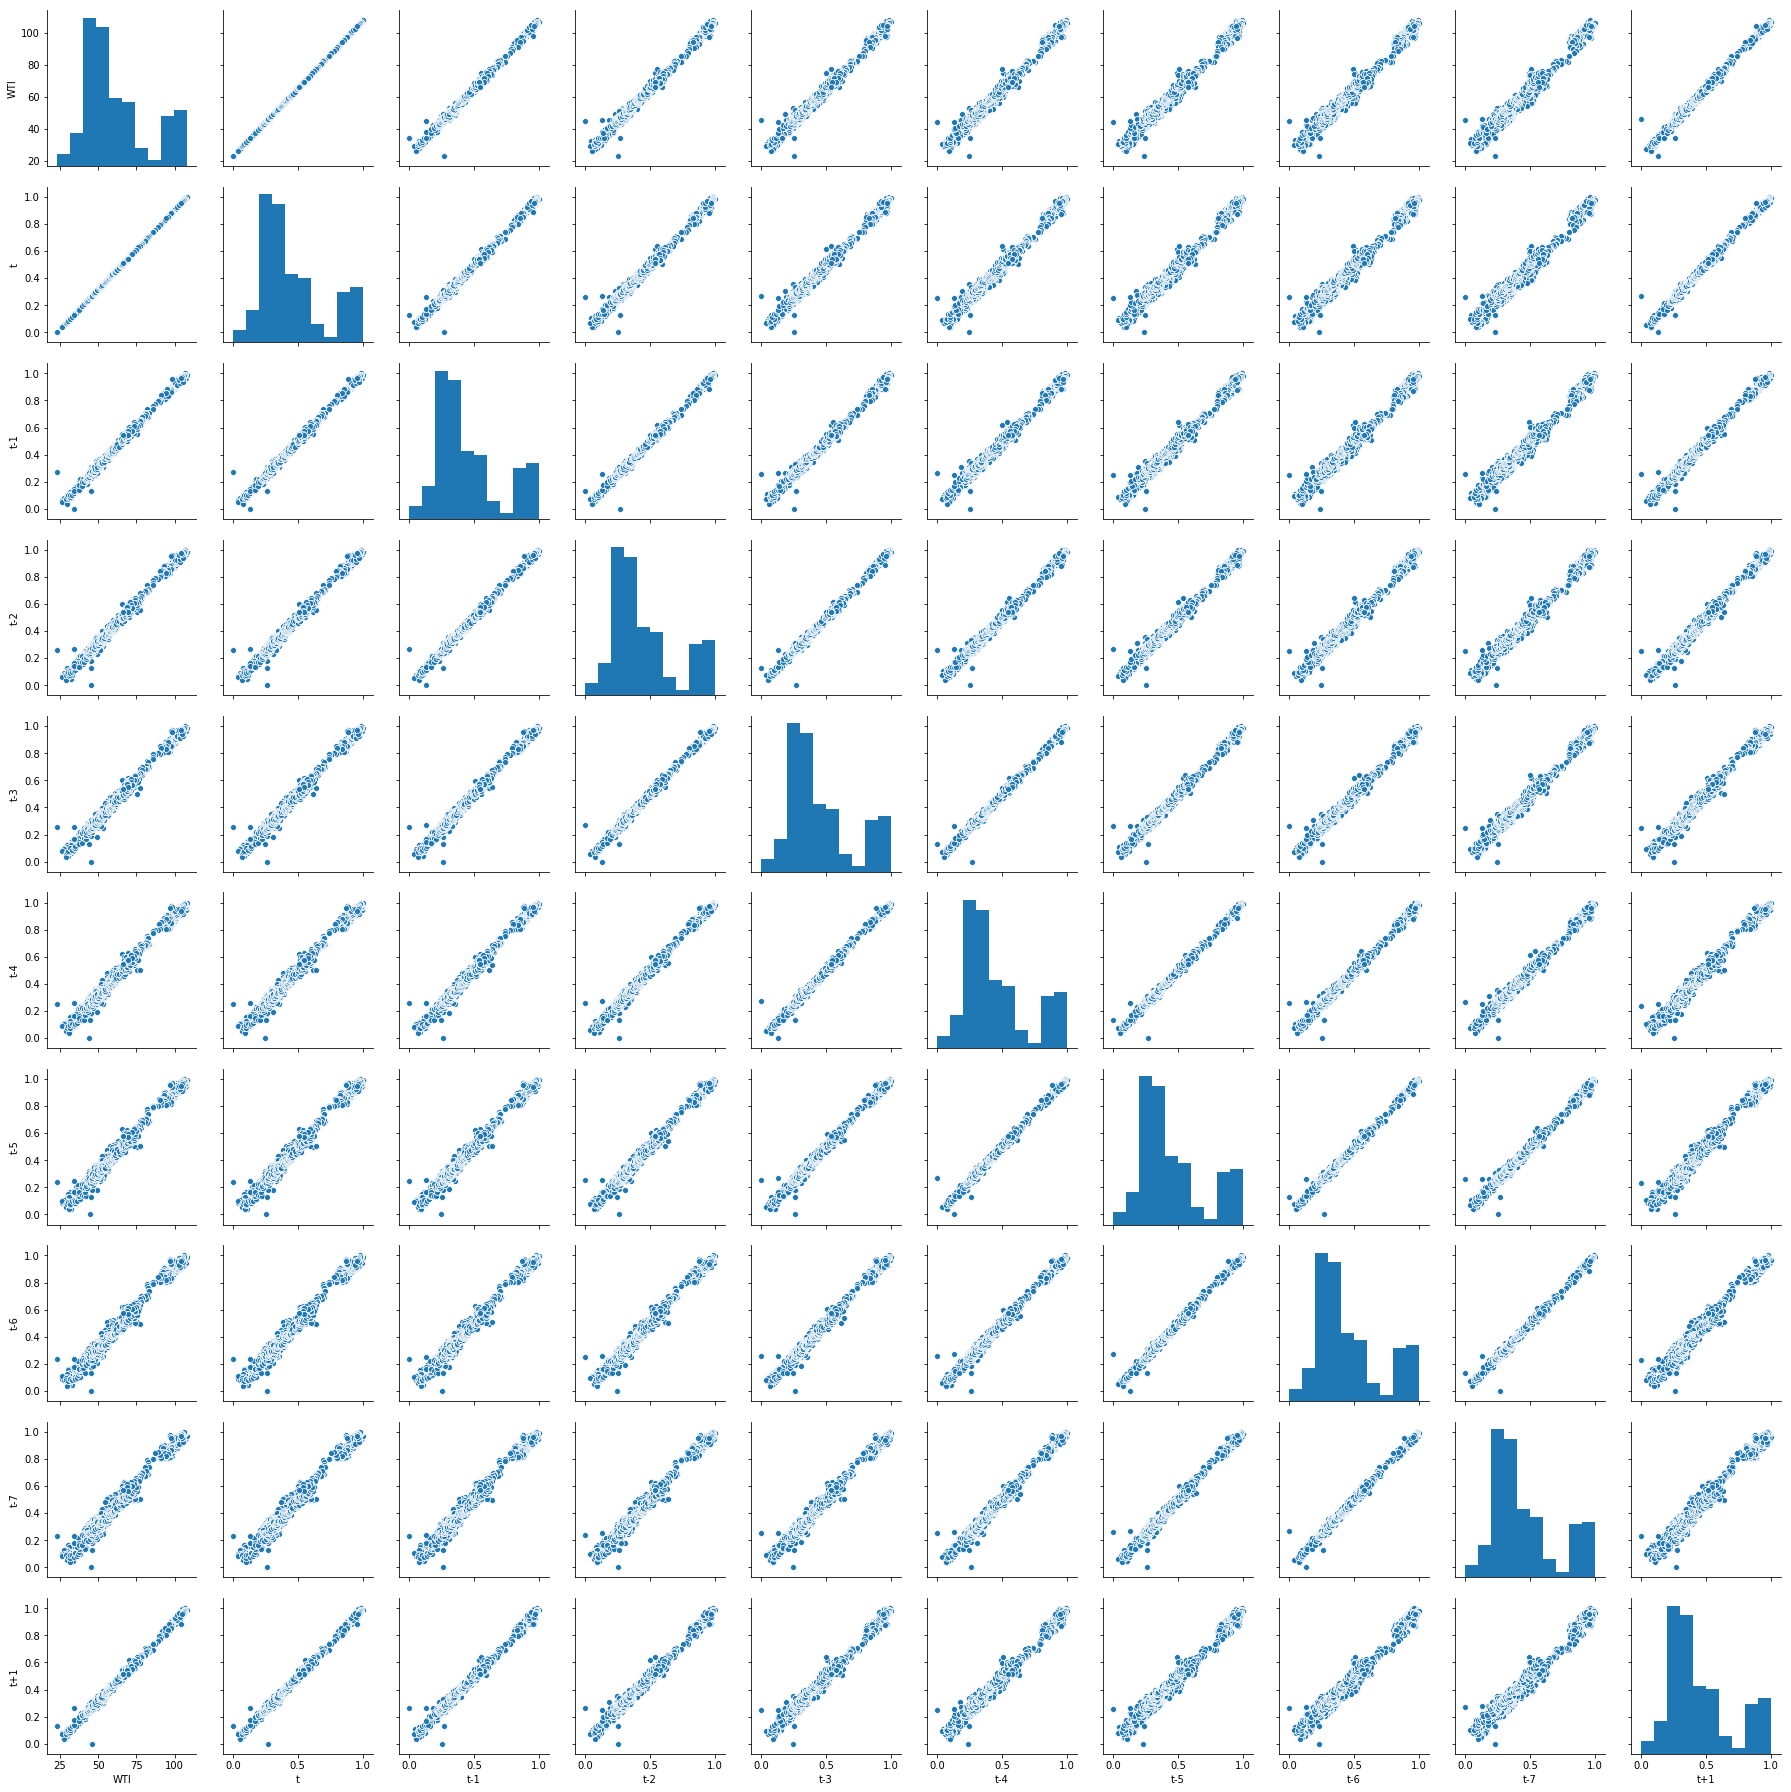

In [912]:
sns.pairplot(data = df_train)
plt.show()

The pair plot above shows the correlations between a given day and up to 8 days before it. We find a surprising correlations among the days and makes us confident that using a window of 8 days to predict one day in the future is a good approach.

## Shaping the data to be fed into the LSTM

### Splitting the data into training and validation sets

In [1400]:
train_size = int(0.9*len(df))
past = ['t']+['t-'+str(i) for i in range(1,n_past)]
future = ['t+'+str(i) for i in range(1,n_future+1)]
X_train, y_train = df[past][:train_size], df[future][:train_size]
X_valid, y_valid = df[past][train_size:], df[future][train_size:]

### Shaping the data as input to LSTM

The data input for the LSTM should have the following shape __[n_samples, n_timesteps, n_features]__, where
 - __n_samples__: The number of time series. This in effect is controlled by the past and future windows.
 - __n_timesteps__: how many days in the past are being used to predict the future. This is the past window.
 - __n_features__: how many variables are used to train, here only one: the WTI price

Here, for the training dataset, we have
 - __n_samples__ = 90% of the training data
 - __n_timesteps__ = 7
 - __n_features__ = 1
 
So we need to reshape the input and output data into matrices of that shape

## Defining and training the LSTM model

In [917]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(1))#y_train.shape[1]
model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

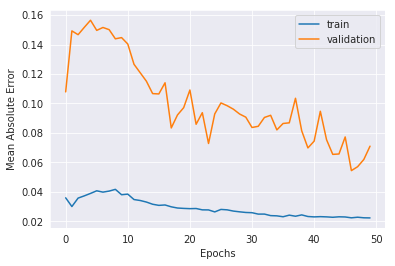

In [1438]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Make predictions

In [1401]:
df_train.head()

,DATE,WTI,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t+1
0,2013-11-14,93.76,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.828703,0.833412
1,2013-11-15,93.80,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.824347
2,2013-11-18,93.03,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.828114
3,2013-11-19,93.35,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.827996
4,2013-11-20,93.34,0.827996,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.851660


In [1404]:
prediction_run_forward(df_predict, target_date, scaler, model)

In [1408]:
df_train.head()

,DATE,WTI,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t+1,predict t+1,predict WTI
0,2013-11-14,93.76,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.828703,0.833412,0.745549,86.336929
1,2013-11-15,93.80,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.844478,0.824347,0.744079,86.212034
2,2013-11-18,93.03,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.838710,0.828114,0.744214,86.223542
3,2013-11-19,93.35,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.842359,0.827996,0.742472,86.075551
4,2013-11-20,93.34,0.827996,0.828114,0.824347,0.833412,0.832941,0.834707,0.825406,0.849070,0.851660,0.739934,85.860022


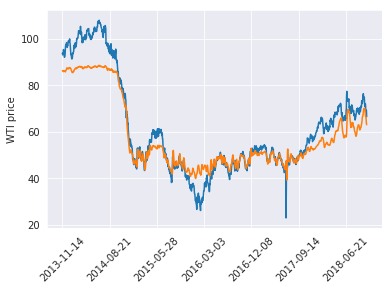

In [1410]:
def plot_real_prediction():
    df_train['WTI'].plot()
    df_train['predict WTI'].shift(1).plot()
    tick_loc = [0, 200, 400, 600, 800, 1000, 1200]
    tick_label = [df_train.loc[i,'DATE'] for i in tick_loc]
    plt.xticks(tick_loc, tick_label)
    plt.xticks(rotation=45)
    plt.ylabel('WTI price')
    plt.show()
plot_real_prediction()

## Predict price on Friday Nov. 16th

In [1456]:
df_predict['original?'] = ['original' for i in range(len(df_predict))]

/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1482]:
df_predict

,DATE,WTI,original?
1297,2018-10-25,67.250000,original
1298,2018-10-26,67.580000,original
1299,2018-10-29,67.000000,original
1300,2018-10-30,66.180000,original
1301,2018-10-31,65.310000,original
1302,2018-11-01,63.670000,original
1303,2018-11-02,63.120000,original
1304,2018-11-05,63.120000,original
1305,2018-11-06,65.878639,predicted
1306,2018-11-07,65.537865,predicted


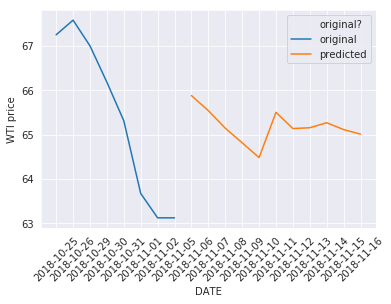

In [1481]:
fig = plt.figure()
sns.lineplot(x="DATE", y="WTI", data=df_predict, hue = 'original?')
plt.xticks(rotation=45)
plt.ylabel('WTI price')
fig.savefig('WTI_oil_price_predictions.png', bbox_inches='tight', dpi=500)
plt.show()